In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

Załadowanie i wyświetlenie notowań spółek giełdowych

In [2]:
df = pd.read_excel("Notowania_spolek.xls", index_col="Data")
df

,MMM,T,ADBE,BAC,CVX,HLT,SBUX
Data,,,,,,,
2021-05-27,203.240005,22.439577,498.279999,42.549999,103.010002,126.269997,113.510002
2021-05-28,203.039993,22.228098,504.579987,42.389999,103.790001,125.269997,113.879997
2021-06-01,203.199997,22.145016,495.910004,42.919998,106.650002,126.610001,113.339996
2021-06-02,203.289993,22.364048,495.769989,42.939999,108.080002,125.169998,113.000000
2021-06-03,203.669998,22.077040,493.140015,43.250000,107.589996,123.129997,111.120003
...,...,...,...,...,...,...,...
2022-05-20,143.830002,21.165500,399.089996,33.860001,167.820007,130.279999,73.389999
2022-05-23,144.380005,20.740000,406.760010,35.869999,171.720001,132.350006,73.419998
2022-05-24,145.750000,21.160000,398.410004,35.650002,172.639999,128.279999,72.720001


Tworzymy listę spółek

In [3]:
stocks = ['MMM', "T", "ABDE", "BAC", "CVX", "HLT", "SBUX"]

Liczymy zanualizowaną dzienną stopę zwrotu: Dzienna stopa zwrotu = (Cena zamknięcia D/Cena zamknięcia D-1) * 252

In [4]:
returns = df.pct_change()
returns.head()

,MMM,T,ADBE,BAC,CVX,HLT,SBUX
Data,,,,,,,
2021-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-28,-0.000984,-0.009424,0.012643,-0.003760,0.007572,-0.007920,0.003260
2021-06-01,0.000788,-0.003738,-0.017183,0.012503,0.027556,0.010697,-0.004742
2021-06-02,0.000443,0.009891,-0.000282,0.000466,0.013408,-0.011374,-0.003000
2021-06-03,0.001869,-0.012833,-0.005305,0.007219,-0.004534,-0.016298,-0.016637


Wyświetlamy wykresy stóp zwrotu spółek

<Figure size 1080x360 with 0 Axes>

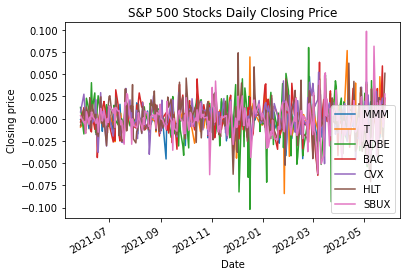

In [5]:
plt.figure(figsize=(15,5))
returns.plot()
plt.title('S&P 500 Stocks Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

Liczymy macierz kowariancji ze stóp zwrotów spółek

In [6]:
cov = returns.cov()
cov.head()

,MMM,T,ADBE,BAC,CVX,HLT,SBUX
MMM,0.000164,0.000063,6.276985e-05,0.000110,6.440209e-05,0.000064,0.000095
T,0.000063,0.000234,-1.429148e-05,0.000074,3.967268e-05,0.000049,0.000063
ADBE,0.000063,-0.000014,5.422307e-04,0.000093,5.970567e-07,0.000183,0.000219
BAC,0.000110,0.000074,9.292668e-05,0.000337,1.235600e-04,0.000200,0.000138
CVX,0.000064,0.000040,5.970567e-07,0.000124,2.859072e-04,0.000096,0.000040


Ponieważ próbujemy zoptymalizować portfel przez zmianę alokacji wag, zainicjalizujmy nasze wagi i obliczmy początkowe metryki za pomocą poniższej funkcji. Wagi muszą pochodzić z rozkładu równomiernego od 0 do 1 (ponieważ wagi oznaczają udziały procentowe) dlatego korzystamy z rozkładu jednostajnego w przedziale (0,1)

In [ ]:
len(stocks)

In [7]:
np.random.seed(10) 
weights = np.random.random(len(stocks))
weights = weights/np.sum(weights)
weights

array([0.24914333, 0.00670306, 0.20467393, 0.24187022, 0.16102213,
       0.07261129, 0.06397604])

Liczymy stopę zwrotu z portfela

In [8]:
portfolio_returns = (returns.mean()*252)@weights 
portfolio_returns

-0.04812892802771309

Liczymy wariancję portfela jako iloczyn wag i kowariancji pomnożonej przez 252

In [9]:
portfolio_variance = weights@(cov*252)@weights 
portfolio_variance

0.03558116877321658

Liczymy wskaźnik Sharpe'a portfela z wykorzystaniem średniej zanualizowanej stopy zwrotu oraz wariancji portfela

Tworzymy nową ramkę danych, do której wstawiamy obliczone charakterystyki portfela

In [10]:
def portfolio_metrics(weights, index='Trial'):
    rf = 0.03
    rp = (returns.mean()*252)@weights 
    port_var = weights@(cov*252)@weights
    sharpe = (rp-rf)/np.sqrt(port_var)
    df = pd.DataFrame({"Oczekiwany zwrot": rp,
                       "Wariancja portfela":port_var,
                       'Odchylenie standardowe portfela': np.sqrt(port_var),
                       'Wskaźnik Sharpa': sharpe}, index=[index])
    return df

In [11]:
weights = np.random.random(len(stocks))
weights

array([0.76053071, 0.16911084, 0.08833981, 0.68535982, 0.95339335,
       0.00394827, 0.51219226])

Za pomocą symulacji Monte Carlo generujemy 10 000 portfeli inwestycyjnych

In [15]:
np.random.seed(42)

portfolios = pd.DataFrame(columns=[*stocks, "Oczekiwany zwrot","Wariancja portfela", "Odchylenie standardowe portfela", "Wskaźnik Sharpa"])

for i in range(10000):
    weights = np.random.random(len(stocks))
    weights = weights/np.sum(weights)
    portfolios.loc[i, stocks] = weights
    metrics = portfolio_metrics(weights,i)
    portfolios.loc[i, ["Oczekiwany zwrot","Wariancja portfela", "Odchylenie standardowe portfela", "Wskaźnik Sharpa"]] = \
    metrics.loc[i,["Oczekiwany zwrot","Wariancja portfela", "Odchylenie standardowe portfela", "Wskaźnik Sharpa"]]
    
portfolios

,MMM,T,ABDE,BAC,CVX,HLT,SBUX,Oczekiwany zwrot,Wariancja portfela,Odchylenie standardowe portfela,Wskaźnik Sharpa
0,0.123774,0.314181,0.241901,0.197838,0.051559,0.051551,0.019195,-0.066416,0.031147,0.176486,-0.546308
1,0.205711,0.142761,0.168163,0.004889,0.230347,0.1977,0.050429,0.056,0.030158,0.173661,0.149714
2,0.071889,0.072513,0.120289,0.207475,0.17078,0.115144,0.24191,-0.036053,0.037974,0.19487,-0.33896
3,0.050667,0.106113,0.13307,0.165654,0.285191,0.072525,0.18678,0.052512,0.033549,0.183163,0.122906
4,0.174419,0.013676,0.178874,0.050206,0.019153,0.279371,0.284302,-0.134876,0.050371,0.224435,-0.734627
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.135321,0.193182,0.20479,0.243823,0.030629,0.04872,0.143534,-0.126527,0.03499,0.187055,-0.836798
9996,0.033952,0.024305,0.174665,0.189967,0.221078,0.240042,0.115991,0.066546,0.043182,0.207802,0.175872
9997,0.239304,0.009253,0.212502,0.078511,0.225101,0.054364,0.180965,-0.038656,0.034219,0.184985,-0.371143
9998,0.180899,0.162194,0.025264,0.300144,0.074558,0.196859,0.060082,-0.043273,0.036999,0.192351,-0.380936


Znajdujemy portfel o najwyższym wskaźniku Sharpe'a

In [16]:
portfolios[portfolios["Wskaźnik Sharpa"]==portfolios["Wskaźnik Sharpa"].max()]

,MMM,T,ABDE,BAC,CVX,HLT,SBUX,Oczekiwany zwrot,Wariancja portfela,Odchylenie standardowe portfela,Wskaźnik Sharpa
6554,0.142538,0.052112,0.01697,0.06837,0.479835,0.222445,0.017729,0.249559,0.039001,0.197486,1.111771
